# Car Acceptability Classification

## Data Loading

In [1]:
# Importing dataset via kaggle

!kaggle datasets download -d subhajeetdas/car-acceptability-classification-dataset

Dataset URL: https://www.kaggle.com/datasets/subhajeetdas/car-acceptability-classification-dataset
License(s): CC-BY-NC-SA-4.0
  0%|                                               | 0.00/9.40k [00:00<?, ?B/s]
100%|███████████████████████████████████████| 9.40k/9.40k [00:00<00:00, 138kB/s]


In [2]:
# Exporting dataset from zipfile

import zipfile
zip_ref = zipfile.ZipFile('/home/bhxveshhh/ML/Car Acceptability Classification/car-acceptability-classification-dataset.zip', 'r')
zip_ref.extractall('/home/bhxveshhh/ML/Car Acceptability Classification')
zip_ref.close()

## Exploratory Data Analysis

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

In [34]:
df = pd.read_csv('car.csv')

In [6]:
df.head(5)

,Buying_Price,Maintenance_Price,No_of_Doors,Person_Capacity,Size_of_Luggage,Safety,Car_Acceptability
0,vhigh,vhigh,2,2,small,low,unacc
1,vhigh,vhigh,2,2,small,med,unacc
2,vhigh,vhigh,2,2,small,high,unacc
3,vhigh,vhigh,2,2,med,low,unacc
4,vhigh,vhigh,2,2,med,med,unacc


In [7]:
df.shape

(1728, 7)

In [8]:
df.size

12096

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1728 entries, 0 to 1727
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   Buying_Price       1728 non-null   object
 1   Maintenance_Price  1728 non-null   object
 2   No_of_Doors        1728 non-null   object
 3   Person_Capacity    1728 non-null   object
 4   Size_of_Luggage    1728 non-null   object
 5   Safety             1728 non-null   object
 6   Car_Acceptability  1728 non-null   object
dtypes: object(7)
memory usage: 94.6+ KB


In [10]:
df.describe().T

,count,unique,top,freq
Buying_Price,1728,4,vhigh,432
Maintenance_Price,1728,4,vhigh,432
No_of_Doors,1728,4,2,432
Person_Capacity,1728,3,2,576
Size_of_Luggage,1728,3,small,576
Safety,1728,3,low,576
Car_Acceptability,1728,4,unacc,1210


In [11]:
df.isnull().sum()

Buying_Price         0
Maintenance_Price    0
No_of_Doors          0
Person_Capacity      0
Size_of_Luggage      0
Safety               0
Car_Acceptability    0
dtype: int64

In [12]:
df.duplicated().sum()

np.int64(0)

In [13]:
df.nunique()

Buying_Price         4
Maintenance_Price    4
No_of_Doors          4
Person_Capacity      3
Size_of_Luggage      3
Safety               3
Car_Acceptability    4
dtype: int64

In [14]:
df['Car_Acceptability'].unique()

array(['unacc', 'acc', 'vgood', 'good'], dtype=object)

In [15]:
df['Car_Acceptability'].value_counts()

Car_Acceptability
unacc    1210
acc       384
good       69
vgood      65
Name: count, dtype: int64

## Data Visualization

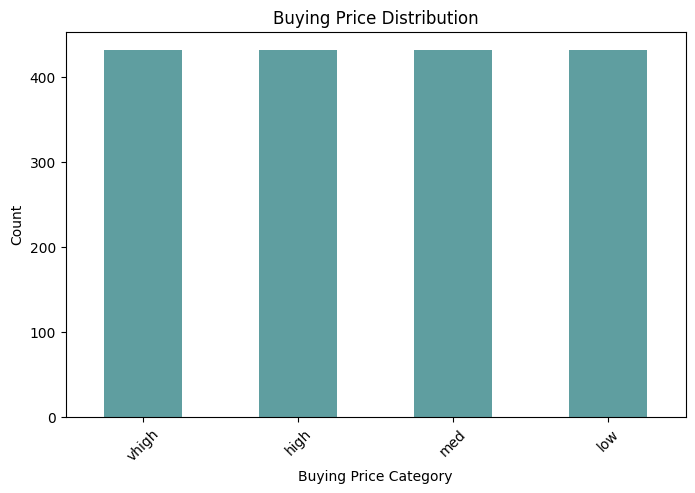

In [36]:
# Bar Chart – Buying Price Distribution

plt.figure(figsize=(8, 5))
df['Buying_Price'].value_counts().plot(kind='bar', color='cadetblue')
plt.xlabel('Buying Price Category')
plt.ylabel('Count')
plt.title('Buying Price Distribution')
plt.xticks(rotation=45)
plt.show()

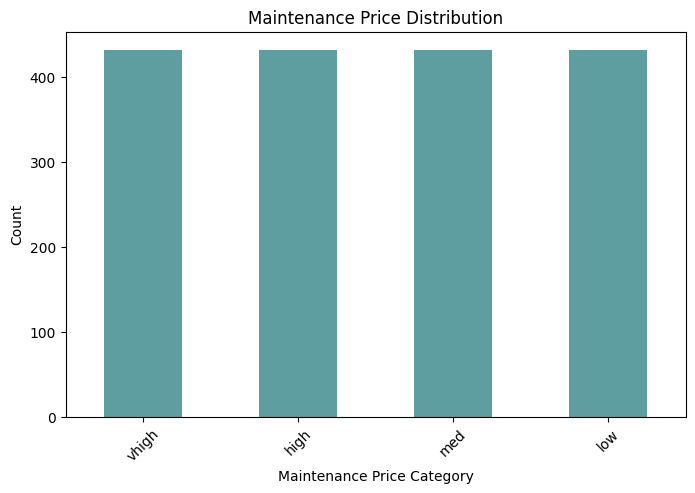

In [38]:
# Bar Chart – Maintenance Price Distribution

plt.figure(figsize=(8, 5))
df['Maintenance_Price'].value_counts().plot(kind='bar', color='cadetblue')
plt.xlabel('Maintenance Price Category')
plt.ylabel('Count')
plt.title('Maintenance Price Distribution')
plt.xticks(rotation=45)
plt.show()

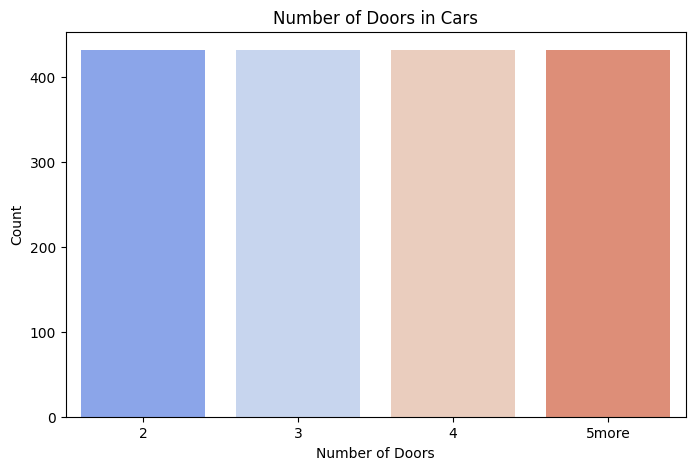

In [39]:
# Count Plot – Number of Doors

plt.figure(figsize=(8, 5))
sns.countplot(x=df['No_of_Doors'], palette='coolwarm')
plt.xlabel('Number of Doors')
plt.ylabel('Count')
plt.title('Number of Doors in Cars')
plt.show()

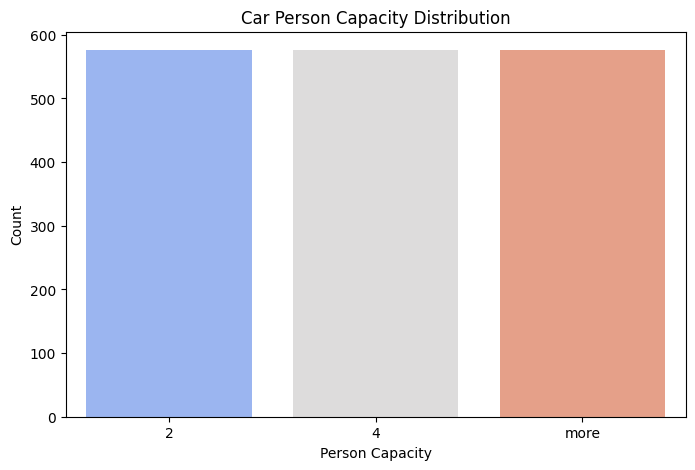

In [40]:
# Count Plot – Person Capacity

plt.figure(figsize=(8, 5))
sns.countplot(x=df['Person_Capacity'], palette='coolwarm')
plt.xlabel('Person Capacity')
plt.ylabel('Count')
plt.title('Car Person Capacity Distribution')
plt.show()

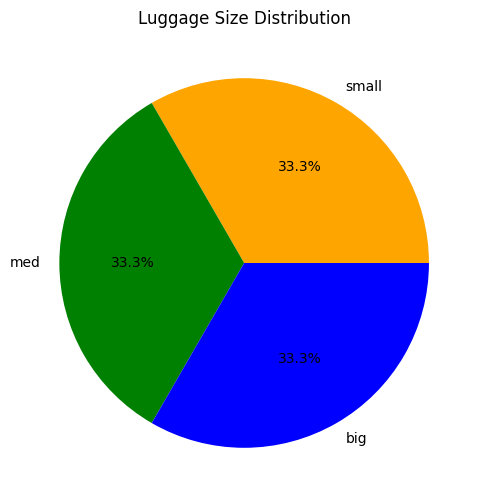

In [41]:
# Pie Chart – Size of Luggage Distribution

plt.figure(figsize=(6, 6))
df['Size_of_Luggage'].value_counts().plot(kind='pie', autopct='%1.1f%%', colors=['orange', 'green', 'blue', 'yellow'])
plt.title('Luggage Size Distribution')
plt.ylabel('')
plt.show()

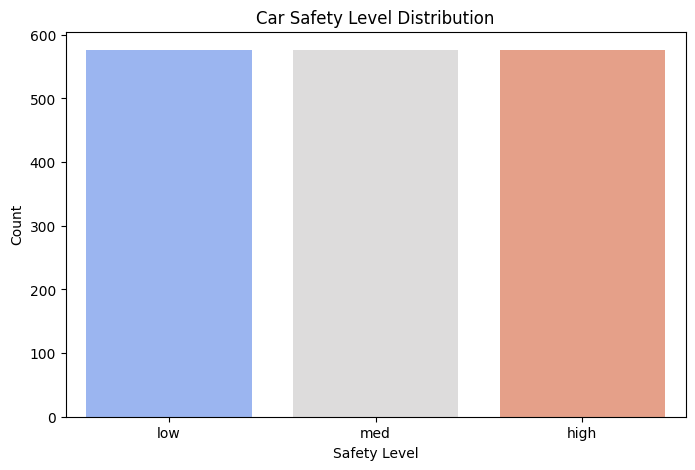

In [42]:
# Count Plot – Safety Ratings

plt.figure(figsize=(8, 5))
sns.countplot(x=df['Safety'], palette='coolwarm')
plt.xlabel('Safety Level')
plt.ylabel('Count')
plt.title('Car Safety Level Distribution')
plt.show()

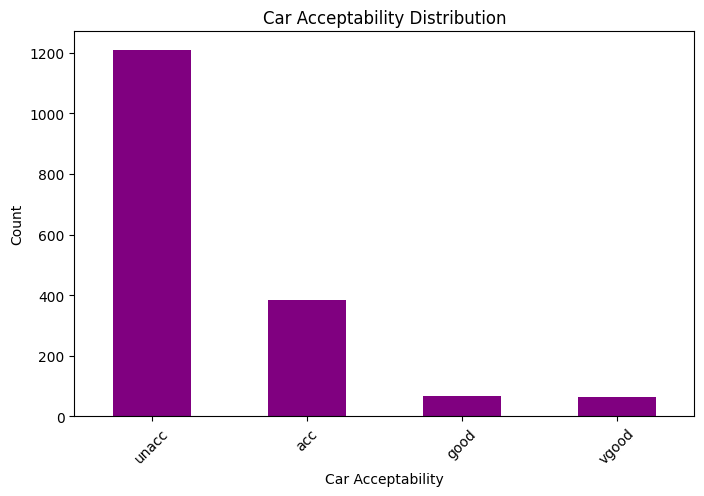

In [43]:
# Bar Chart – Car Acceptability

plt.figure(figsize=(8, 5))
df['Car_Acceptability'].value_counts().plot(kind='bar', color='purple')
plt.xlabel('Car Acceptability')
plt.ylabel('Count')
plt.title('Car Acceptability Distribution')
plt.xticks(rotation=45)
plt.show()

<Figure size 1000x600 with 0 Axes>

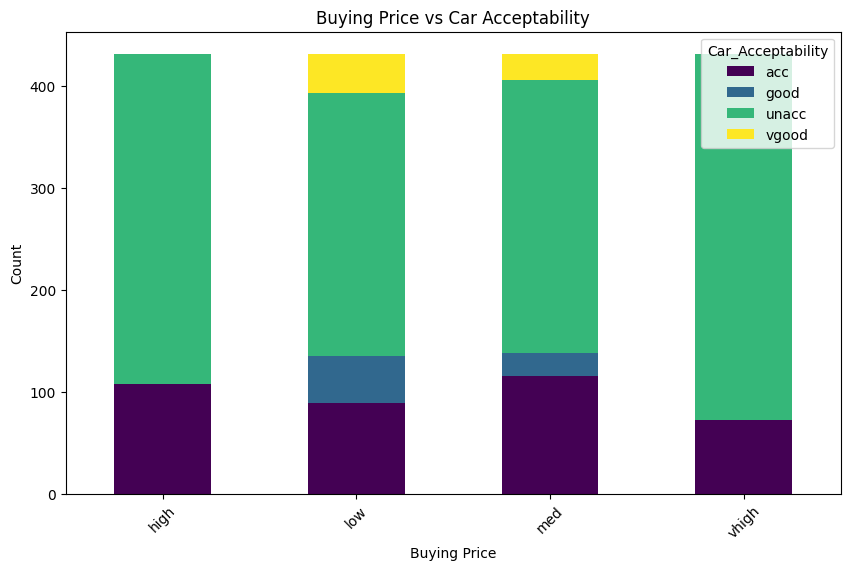

In [44]:
# Stacked Bar Chart – Buying Price vs Car Acceptability

plt.figure(figsize=(10, 6))
df.groupby(['Buying_Price', 'Car_Acceptability']).size().unstack().plot(kind='bar', stacked=True, figsize=(10, 6), colormap='viridis')
plt.xlabel('Buying Price')
plt.ylabel('Count')
plt.title('Buying Price vs Car Acceptability')
plt.xticks(rotation=45)
plt.show()

<Figure size 1000x600 with 0 Axes>

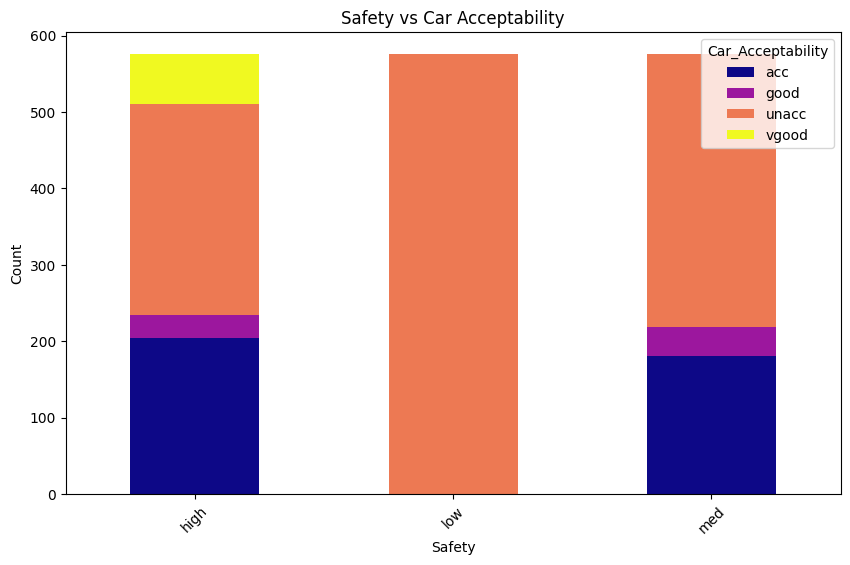

In [45]:
# Stacked Bar Chart – Safety vs Car Acceptability

plt.figure(figsize=(10, 6))
df.groupby(['Safety', 'Car_Acceptability']).size().unstack().plot(kind='bar', stacked=True, figsize=(10, 6), colormap='plasma')
plt.xlabel('Safety')
plt.ylabel('Count')
plt.title('Safety vs Car Acceptability')
plt.xticks(rotation=45)
plt.show()

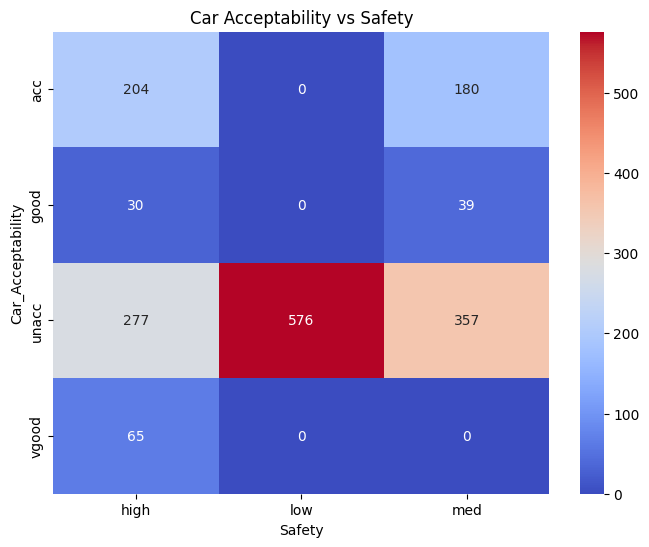

In [46]:
# Heatmap – Relationship Between Categorical Features

plt.figure(figsize=(8, 6))
sns.heatmap(pd.crosstab(df['Car_Acceptability'], df['Safety']), annot=True, cmap='coolwarm', fmt='d')
plt.title('Car Acceptability vs Safety')
plt.show()

## Data Preprocessing

In [22]:
# Label Encoding

from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()

for column in df.columns:
	df[column] = le.fit_transform(df[column])

In [23]:
X = df.drop('Car_Acceptability', axis=1)
y = df['Car_Acceptability']

In [24]:
# Dealing with Data Imbalance

from imblearn.over_sampling import SMOTE
from collections import Counter

sm = SMOTE(random_state=42)
X, y = sm.fit_resample(X, y)

print('Original dataset shape %s' % Counter(y))
print('Resampled dataset shape %s' % Counter(y))

Original dataset shape Counter({2: 1210, 0: 1210, 3: 1210, 1: 1210})
Resampled dataset shape Counter({2: 1210, 0: 1210, 3: 1210, 1: 1210})


In [25]:
# Train Test Split

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

## Model Training

In [27]:
from sklearn.linear_model import LogisticRegression, RidgeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier, BaggingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import r2_score

In [29]:
logistic_clf = LogisticRegression()
ridge_clf = RidgeClassifier()
xgboost_clf = XGBClassifier()
random_forest_clf = RandomForestClassifier()
ada_boost_clf = AdaBoostClassifier()
grad_boost_clf = GradientBoostingClassifier()
bagging_clf = BaggingClassifier()
decision_tree_clf = DecisionTreeClassifier()
svm_clf = SVC()

In [30]:
model_li = [logistic_clf, ridge_clf, xgboost_clf, random_forest_clf, 
            ada_boost_clf, grad_boost_clf, bagging_clf, decision_tree_clf, svm_clf]

scores = []
for model in model_li:
    model.fit(X_train, y_train)
    scores.append(accuracy_score(y_test, model.predict(X_test)))

print(scores)

[0.5640495867768595, 0.5247933884297521, 0.996900826446281, 0.993801652892562, 0.7995867768595041, 0.9855371900826446, 0.9948347107438017, 0.9958677685950413, 0.9783057851239669]


## Model Evaluation

In [31]:
from sklearn.metrics import classification_report, confusion_matrix

Model: LogisticRegression
Classification Report:
               precision    recall  f1-score   support

           0       0.26      0.21      0.23       236
           1       0.48      0.49      0.48       227
           2       0.63      0.59      0.61       267
           3       0.77      0.96      0.85       238

    accuracy                           0.56       968
   macro avg       0.53      0.56      0.54       968
weighted avg       0.54      0.56      0.55       968

Confusion Matrix:
 [[ 49  79  55  53]
 [ 82 111  34   0]
 [ 51  42 158  16]
 [  7   0   3 228]]


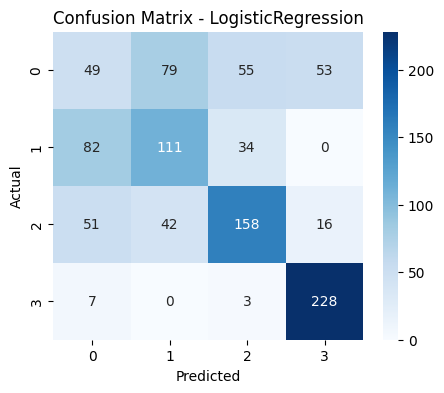

Model: RidgeClassifier
Classification Report:
               precision    recall  f1-score   support

           0       0.36      0.12      0.18       236
           1       0.43      0.37      0.40       227
           2       0.52      0.58      0.55       267
           3       0.61      1.00      0.76       238

    accuracy                           0.52       968
   macro avg       0.48      0.52      0.47       968
weighted avg       0.48      0.52      0.48       968

Confusion Matrix:
 [[ 29  77  60  70]
 [ 27  85  84  31]
 [ 24  37 156  50]
 [  0   0   0 238]]


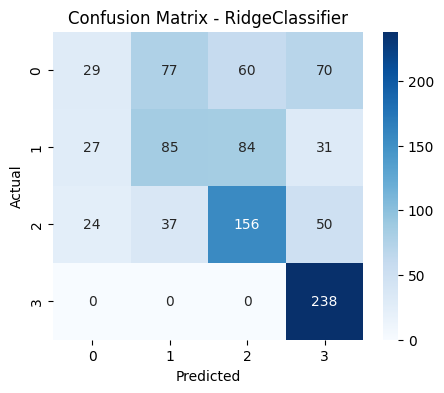

Model: XGBClassifier
Classification Report:
               precision    recall  f1-score   support

           0       0.99      1.00      0.99       236
           1       1.00      1.00      1.00       227
           2       1.00      0.99      1.00       267
           3       1.00      1.00      1.00       238

    accuracy                           1.00       968
   macro avg       1.00      1.00      1.00       968
weighted avg       1.00      1.00      1.00       968

Confusion Matrix:
 [[236   0   0   0]
 [  1 226   0   0]
 [  2   0 265   0]
 [  0   0   0 238]]


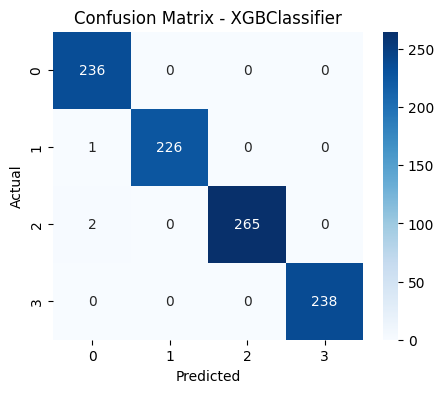

Model: RandomForestClassifier
Classification Report:
               precision    recall  f1-score   support

           0       0.98      1.00      0.99       236
           1       1.00      1.00      1.00       227
           2       1.00      0.99      0.99       267
           3       1.00      1.00      1.00       238

    accuracy                           0.99       968
   macro avg       0.99      1.00      0.99       968
weighted avg       0.99      0.99      0.99       968

Confusion Matrix:
 [[236   0   0   0]
 [  1 226   0   0]
 [  4   0 263   0]
 [  0   0   0 238]]


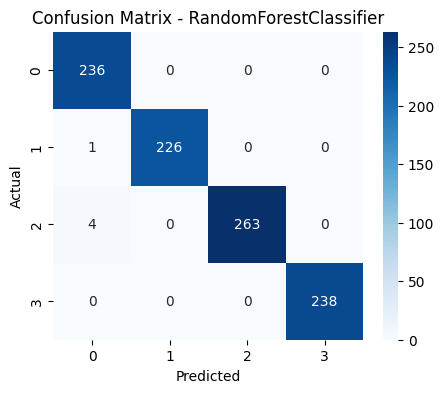

Model: AdaBoostClassifier
Classification Report:
               precision    recall  f1-score   support

           0       0.79      0.61      0.69       236
           1       0.75      0.83      0.79       227
           2       1.00      0.76      0.86       267
           3       0.72      1.00      0.84       238

    accuracy                           0.80       968
   macro avg       0.81      0.80      0.79       968
weighted avg       0.82      0.80      0.80       968

Confusion Matrix:
 [[144  52   0  40]
 [  0 189   0  38]
 [ 39  12 203  13]
 [  0   0   0 238]]


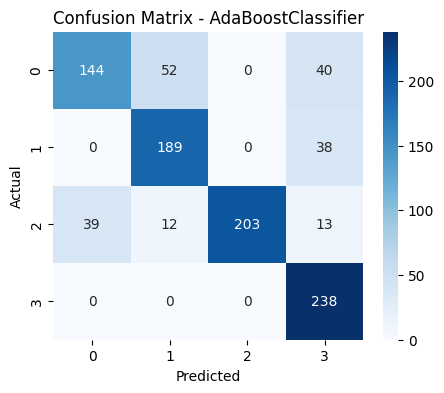

Model: GradientBoostingClassifier
Classification Report:
               precision    recall  f1-score   support

           0       0.97      0.97      0.97       236
           1       0.97      1.00      0.98       227
           2       1.00      0.97      0.98       267
           3       1.00      1.00      1.00       238

    accuracy                           0.99       968
   macro avg       0.99      0.99      0.99       968
weighted avg       0.99      0.99      0.99       968

Confusion Matrix:
 [[230   6   0   0]
 [  0 227   0   0]
 [  7   1 259   0]
 [  0   0   0 238]]


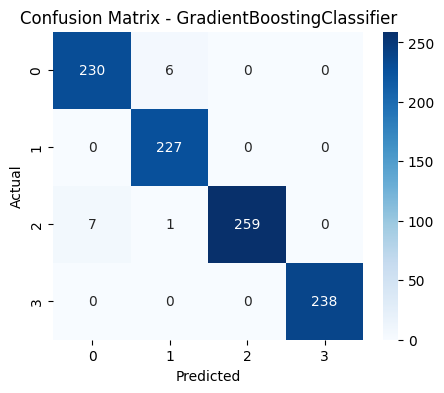

Model: BaggingClassifier
Classification Report:
               precision    recall  f1-score   support

           0       0.99      1.00      0.99       236
           1       1.00      1.00      1.00       227
           2       1.00      0.99      1.00       267
           3       1.00      1.00      1.00       238

    accuracy                           1.00       968
   macro avg       1.00      1.00      1.00       968
weighted avg       1.00      1.00      1.00       968

Confusion Matrix:
 [[236   0   0   0]
 [  1 226   0   0]
 [  2   0 265   0]
 [  0   0   0 238]]


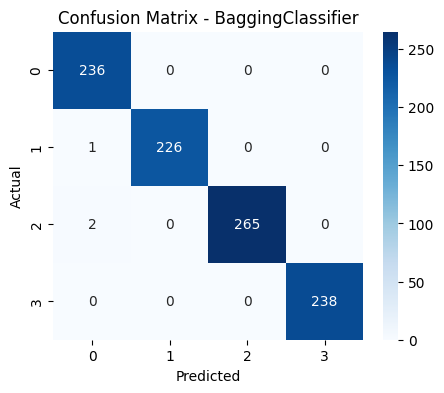

Model: DecisionTreeClassifier
Classification Report:
               precision    recall  f1-score   support

           0       0.99      0.99      0.99       236
           1       1.00      1.00      1.00       227
           2       0.99      0.99      0.99       267
           3       1.00      1.00      1.00       238

    accuracy                           0.99       968
   macro avg       0.99      0.99      0.99       968
weighted avg       0.99      0.99      0.99       968

Confusion Matrix:
 [[233   0   3   0]
 [  1 226   0   0]
 [  2   0 265   0]
 [  0   0   0 238]]


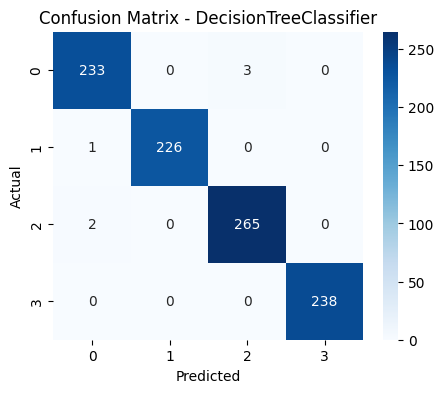

Model: SVC
Classification Report:
               precision    recall  f1-score   support

           0       0.93      0.99      0.96       236
           1       0.98      1.00      0.99       227
           2       1.00      0.95      0.97       267
           3       1.00      0.98      0.99       238

    accuracy                           0.98       968
   macro avg       0.98      0.98      0.98       968
weighted avg       0.98      0.98      0.98       968

Confusion Matrix:
 [[233   3   0   0]
 [  0 227   0   0]
 [ 13   1 253   0]
 [  4   0   0 234]]


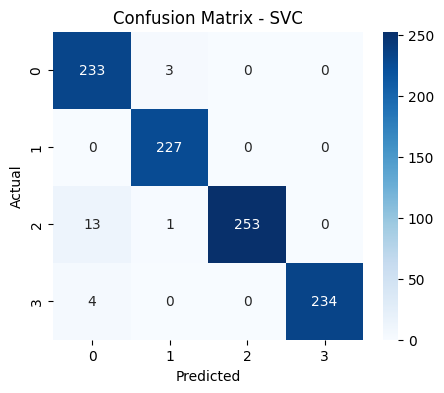

In [32]:
for model in model_li:
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)

    print(f"Model: {model.__class__.__name__}")
    print("Classification Report:\n", classification_report(y_test, y_pred))
    print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))

    # Plot the confusion matrix
    plt.figure(figsize=(5, 4))
    sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt="d", cmap="Blues")
    plt.xlabel("Predicted")
    plt.ylabel("Actual")
    plt.title(f"Confusion Matrix - {model.__class__.__name__}")
    plt.show()